In [48]:
import json
import os

import numpy as np
import pandas as pd

from scipy.spatial import distance
from api.features import TextExtractor, ImageExtractor

from tqdm import tqdm

In [3]:
db_filename = os.path.join('api', 'images', 'db.json')

db = {}
with open(db_filename, 'r') as f:
    db = json.load(f)
    db = db['_default']

In [5]:
df = pd.DataFrame(db).T
df = df.drop(columns=['thumbnail', 'created_utc', 'author', 'ups', 'downs'])
df.head(10)

,title,id,media
1,Num🅱er One,6tehbc,https://i.redd.it/7wgs4dkiihfz.png
2,Got ‘em,8bse8k,https://i.redd.it/65bzzioisir01.jpg
3,50-0,6we7gp,https://i.redd.it/19c4ggoz0ciz.png
4,Allow,7qbcqw,https://i.redd.it/qt5p8ozio0a01.png
5,*mild concern*,7szw80,https://i.redd.it/1cudu2jlgac01.jpg
6,I would kill myself again,7nxaqq,https://i.redd.it/cqtircwmtw701.png
7,Conspiracy,7ep89z,https://i.redd.it/9gx2gd66ehzz.jpg
8,Justin Timberlake,7vbgih,https://i.redd.it/qq501hb3yae01.jpg
9,Lit 🔥,6c13dg,https://i.redd.it/1zb3bomchdyy.jpg
10,Improvise. Adapt. Overcome.,74fa93,https://i.redd.it/ypelzg7uwzpz.jpg


In [6]:
te = TextExtractor()

d:\TSINGHUA\WEB_IR\meme-search\venv\lib\site-packages\torch\nn\parallel\data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


In [7]:
df['title_embedding'] = df['title'].apply(lambda x: te.to_vec(text=x, to_numpy=True))

In [55]:
def get_ocr_from_id(base_path, img_id, formats=['.png', '.jpg'], text_extractor=TextExtractor()):
    img_name = os.path.join(base_path, img_id)
    for ext in formats:
        if os.path.isfile(img_name+ext):
            img_name += ext
            break
    
    embedding = text_extractor.to_vec(filename=img_name, method='precise', to_numpy=True)
    return embedding

te = TextExtractor()
images_path = os.path.join('api', 'images', 'memes', 'memes')

df['ocr_embedding'] = df['title_embedding']
for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        emb = get_ocr_from_id(base_path=images_path, img_id=df['id'][idx], text_extractor=te)
        df['ocr_embedding'][idx] = emb
    except:
        print('Failed to compute embedding for:', row['title'], row['id'])
        df['ocr_embedding'][idx] *= 0

# df['ocr_embedding'] = df['id'].apply(lambda x: get_ocr_from_id(base_path=images_path, img_id=x, text_extractor=te))

df['fusion_text_embedding'] = df['ocr_embedding'] + df['title_embedding']

eek 6a8rj1
 62%|██████▏   | 2009/3226 [12:40<05:00,  4.05it/s]Failed to compute embedding for: Face swapping done right 6ldzxu
Failed to compute embedding for: When the name fits. 7hyl3q
Failed to compute embedding for: Doing 10k tomorrow super bowl run as Alan from hangover. Think I nailed it? 7v3zfb
 63%|██████▎   | 2033/3226 [12:50<08:55,  2.23it/s]Failed to compute embedding for: Spent the afternoon installing these. My wife, ladies and gentlemen. 6qey7n
Failed to compute embedding for: Chris Pratt with his son dressed up for Halloween 7a831r
 63%|██████▎   | 2044/3226 [12:54<03:58,  4.96it/s]Failed to compute embedding for: My buddy's dog saw a moose 6nxa2m
Failed to compute embedding for: Could finally afford a house with a French style garden! 6dtk6u
 64%|██████▍   | 2077/3226 [13:11<05:49,  3.28it/s]Failed to compute embedding for: We had a sudden burst of rain. 758git
Failed to compute embedding for: Faceswap 85ndga
 65%|██████▌   | 2105/3226 [13:25<12:31,  1.49it/s]Failed to 

In [59]:
# df = df.drop(columns=['similarity'])

In [73]:
# Save embeddings in binary format
index_name = os.path.join('api', 'images', 'index.df')
df.to_pickle(index_name)

df.head(10)

,title,id,media,title_embedding,ocr_embedding,fusion_text_embedding,similarity
1,Num🅱er One,6tehbc,https://i.redd.it/7wgs4dkiihfz.png,"[0.01863188, -0.20739332, 0.013166513, -0.1743...","[0.033514775, -0.5541679, 0.29722443, 0.164316...","[0.052146655, -0.7615613, 0.31039095, -0.01004...",14.072817
2,Got ‘em,8bse8k,https://i.redd.it/65bzzioisir01.jpg,"[-0.07004014, -0.25970188, 0.061802924, -0.129...","[-0.010578866, -0.06600039, -0.08460425, -0.01...","[-0.080619, -0.32570225, -0.022801325, -0.1478...",11.955623
3,50-0,6we7gp,https://i.redd.it/19c4ggoz0ciz.png,"[0.14121327, 0.12303875, 0.039618384, 0.090699...","[-0.029373458, -0.29124638, -0.13452958, 0.135...","[0.11183981, -0.16820765, -0.09491119, 0.22583...",12.615986
4,Allow,7qbcqw,https://i.redd.it/qt5p8ozio0a01.png,"[0.3656675, -0.078127824, 0.12735562, 0.034180...","[0.2707137, 0.047175646, 0.25992554, 0.1186498...","[0.63638115, -0.030952178, 0.38728118, 0.15283...",12.146616
5,*mild concern*,7szw80,https://i.redd.it/1cudu2jlgac01.jpg,"[0.22246496, 0.3068338, 0.3397092, 0.06531252,...","[-0.0094173495, 0.04969541, 0.24843481, -0.340...","[0.21304761, 0.3565292, 0.588144, -0.27560985,...",13.184786
6,I would kill myself again,7nxaqq,https://i.redd.it/cqtircwmtw701.png,"[-0.08495418, 0.12341179, 0.07945844, -0.01178...","[-0.34855652, -0.26897722, 0.089246124, -0.094...","[-0.4335107, -0.14556544, 0.16870457, -0.10678...",14.300164
7,Conspiracy,7ep89z,https://i.redd.it/9gx2gd66ehzz.jpg,"[-0.25224248, 0.27384946, 0.46465802, -0.08892...","[-0.305493, 0.19073576, 0.22649771, 0.4865489,...","[-0.55773544, 0.4645852, 0.69115573, 0.3976279...",11.751377
8,Justin Timberlake,7vbgih,https://i.redd.it/qq501hb3yae01.jpg,"[-0.2549375, -0.0066546886, 0.05419556, -0.396...","[0.07801037, -0.48777422, -0.2150497, -0.29330...","[-0.17692712, -0.4944289, -0.16085413, -0.6894...",12.779570
9,Lit 🔥,6c13dg,https://i.redd.it/1zb3bomchdyy.jpg,"[-0.1487281, -0.52275294, 0.03566414, 0.039697...","[-0.12815194, -0.12945667, 0.11817202, 0.00444...","[-0.27688003, -0.65220964, 0.15383616, 0.04414...",13.129776
10,Improvise. Adapt. Overcome.,74fa93,https://i.redd.it/ypelzg7uwzpz.jpg,"[-0.077606335, 0.25728256, 0.124042705, -0.390...","[-0.2839926, -0.19054787, 0.2350142, -0.043494...","[-0.3615989, 0.06673469, 0.3590569, -0.4342085...",12.439244


In [10]:
len(df['title_embedding'][0])

768

In [95]:
query = 'just the same shit'
count = 10
query_embedding = te.to_vec(text=query, to_numpy=True)

XA = np.expand_dims(query_embedding, axis=0)
print(XA.shape)

XB = [np.expand_dims(row, axis=0) for row in df['fusion_text_embedding']]
XB = np.concatenate(XB, axis=0)
print(XB.shape)

scores = distance.cdist(XA, XB, metric='dice')
similarity_scores = [(i,s) for i,s in enumerate(scores)]

# Get Top K
similarity_scores = sorted(similarity_scores, key=lambda x: x[1])
similarity_scores = similarity_scores[0:count]

print(similarity_scores[0][1].shape)

# df_results = df.copy()
# df_results['similarity'] = df_results['title_embedding'].apply(lambda x: distance.euclidean(query_embedding, x))
# df_results = df_results.sort_values(by='similarity', ascending=True)

# df_results = df_results.head(20)
# df_results.head(20)

(1, 768)
(3226, 768)
(3226,)


In [70]:
np_emb = df['ocr_embedding'].to_numpy()
print(np_emb.shape)
print(np_emb[0])

(3226,)
[ 3.35147753e-02 -5.54167926e-01  2.97224432e-01  1.64316759e-01
 -3.79775912e-01 -1.39906615e-01 -3.27239841e-01  3.80304635e-01
 -3.30510169e-01 -1.58940796e-02 -7.09071308e-02  1.65939327e-05
  5.99978209e-01 -1.77975938e-01  4.90544975e-01  1.43458605e-01
  5.31512618e-01  9.25629586e-02  1.06378652e-01  9.90488529e-02
  6.83157220e-02 -5.37366457e-02  3.87686938e-02  2.33037714e-02
 -1.51467979e-01  4.80127394e-01  2.76350558e-01  6.72415376e-01
  2.71610022e-01 -6.11010306e-02  2.17864126e-01 -4.13070500e-01
 -2.00543612e-01  3.10186923e-01 -1.18296817e-01 -5.24319768e-01
  1.33463055e-01  9.74937081e-02 -7.93693900e-01  2.45465036e-03
 -4.27997224e-02 -4.31642830e-01 -7.54906982e-02  1.30078316e-01
  2.26991028e-01  9.84629840e-02  3.48930895e-01  1.74716190e-01
  1.78963870e-01  2.15012431e-01  3.43675911e-01 -1.00569926e-01
  5.30023456e-01  2.13375092e-01 -2.71126539e-01  2.09608346e-01
  3.59269321e-01  2.48466842e-02 -1.42853290e-01  4.27375883e-01
 -2.50010073e-01 

d:\TSINGHUA\WEB_IR\meme-search\venv\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 127345 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
d:\TSINGHUA\WEB_IR\meme-search\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\TSINGHUA\WEB_IR\meme-search\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127345 missing from current font.
  font.set_text(s, 0, flags=flags)


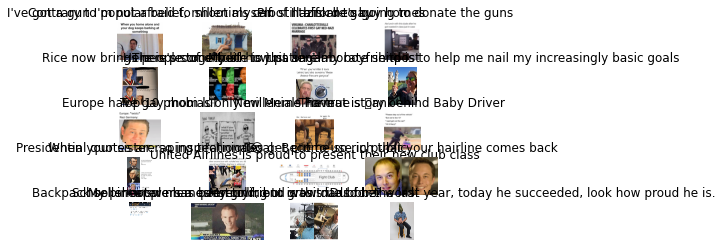

In [40]:
import matplotlib.pyplot as plt
import PIL

images_path = os.path.join('api', 'images', 'memes', 'memes')

i = 0
for idx, row in df_results.iterrows():

    idx = int(idx)

    img_name = os.path.join(images_path, row['id'])

    if os.path.isfile(img_name+'.jpg'): img_name += '.jpg'
    if os.path.isfile(img_name+'.png'): img_name += '.png'

    img = PIL.Image.open(img_name)
    
    plt.subplot(5, 4, i+1)
    plt.title(row['title'])

    plt.axis('off')
    plt.imshow(img)

    i += 1